In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.tools import diff

In [3]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [4]:
#P.354 예제8-7의 AR(1)모형의 자료를 사용
data = pd.read_csv("C:/Users/DongMin/Desktop/시계열분석/제5판_시계열분석_프로그램/제5판 시계열분석 data/eg8_7.txt", sep=' ',
                        names=list(range(33)),skipinitialspace=True)

data_1 = np.array(data).flatten()
data_1 = data_1[~np.isnan(data_1)]

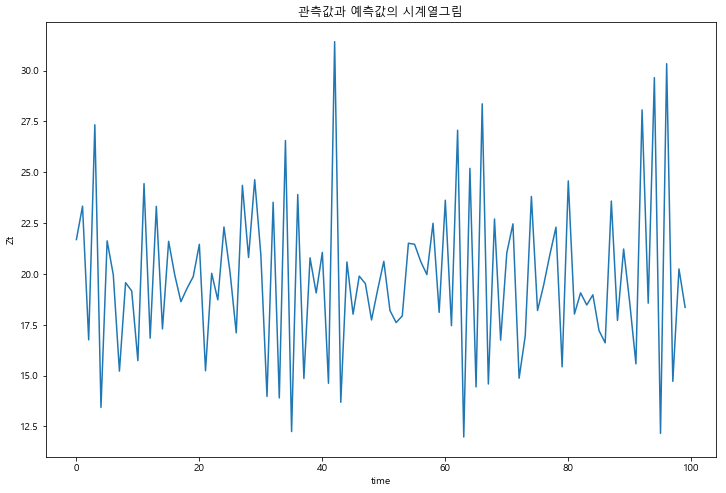

In [5]:
plt.figure(figsize=(12,8))
plt.plot(data_1, label='z')
plt.title('관측값과 예측값의 시계열그림')
plt.xlabel('time')
plt.ylabel('Zt')
plt.show()

In [6]:
#data를 AR(1)에 fitting
model1=sm.tsa.ARMA(data_1,(1,0))
m_fit1=model1.fit()
print(m_fit1.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(1, 0)   Log Likelihood                -250.611
Method:                       css-mle   S.D. of innovations              2.957
Date:                Thu, 27 Feb 2020   AIC                            507.223
Time:                        17:03:17   BIC                            515.038
Sample:                             0   HQIC                           510.386
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.8312      0.178    111.651      0.000      19.483      20.179
ar.L1.y       -0.6715      0.073     -9.226      0.000      -0.814      -0.529
                                    Roots           

In [7]:
#fitting된 모델을 forecast함수를 통해 25사점까지 예측
fred, se, confint = m_fit1.forecast(25)
#fred = forecast #se = Std Error  #confint = Lower95% ; Upper 95%
Obs=[]
for i in range(101,126):
    Obs.append(i)
table_fred = pd.DataFrame(fred, Obs, columns=['Forecast'])
table_se= pd.DataFrame(se, Obs, columns=['Std Error'])
table_confint=pd.DataFrame(confint, Obs, columns=['Lower 95%','Upper 95%'])
table9_1=pd.concat([table_fred,table_se,table_confint],axis=1)

In [8]:
#표9-1 예측원점(n=100)에서 미래 25시점까지의 예측결과
table9_1

,Forecast,Std Error,Lower 95%,Upper 95%
101,20.822248,2.957007,15.026621,26.617876
102,19.165584,3.561900,12.184388,26.146781
103,20.278107,3.803343,12.823691,27.732523
104,19.530999,3.907349,11.872736,27.189263
105,20.032715,3.953358,12.284276,27.781154
106,19.695791,3.973932,11.907027,27.484554
107,19.922050,3.983176,12.115169,27.728931
108,19.770107,3.987337,11.955070,27.585144
109,19.872143,3.989213,12.053431,27.690856
110,19.803622,3.990058,11.983252,27.623991


In [9]:
n=[]
for i in range(1,101):
    n.append(i)
table_data_1=pd.DataFrame(data_1, n, columns=['Forecast'])
graph1=pd.concat([table_data_1,table_fred])

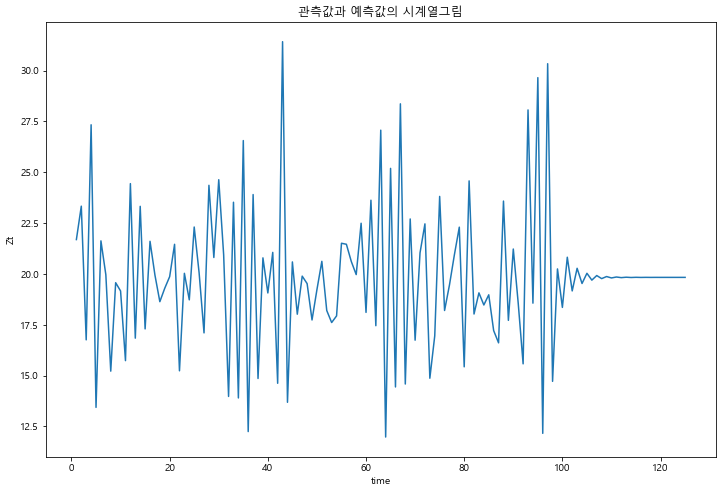

In [10]:
plt.figure(figsize=(12,8))
plt.plot(graph1, label='z')
plt.title('관측값과 예측값의 시계열그림')
plt.xlabel('time')
plt.ylabel('Zt')
plt.show()

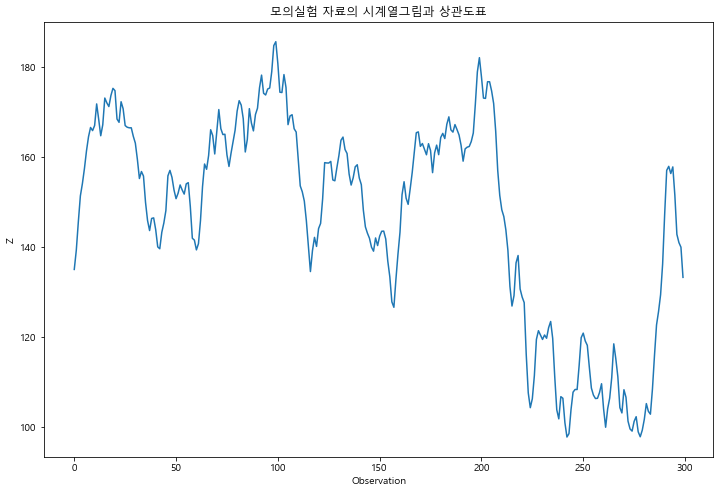

In [20]:
#P.360 예9-5 상수항을 갖는 ARIMA(0,1,1) 또는 IMA(1,1)과정의 예측
data = pd.read_csv("C:/Users/DongMin/Desktop/시계열분석/제5판_시계열분석_프로그램/제5판 시계열분석 data/eg9_5.txt", sep=' ',
                        names=list(range(33)),skipinitialspace=True)

data_2 = np.array(data).flatten()
data_2 = data_2[~np.isnan(data_2)]
plt.figure(figsize=(12,8))
plt.plot(data_2)
plt.title('모의실험 자료의 시계열그림과 상관도표')
plt.xlabel('Observation')
plt.ylabel('Z')
plt.show()

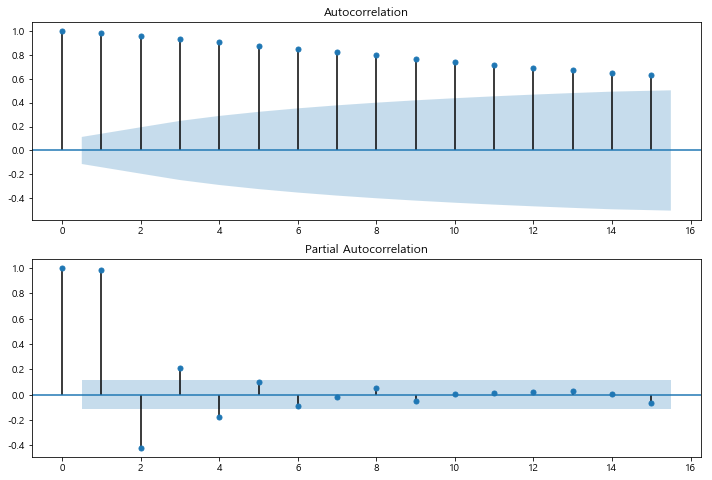

In [28]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = plot_acf(data_2,lags=15,ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(data_2,lags=15,ax=ax2,method='ywmle')

In [17]:
#P362 그림9-3 1차차분된 시계열그림과 상관도표
data = pd.read_csv("C:/Users/DongMin/Desktop/시계열분석/제5판_시계열분석_프로그램/제5판 시계열분석 data/eg9_5.txt", sep=' ',
                        names=list(range(33)),skipinitialspace=True)

data_2 = np.array(data).flatten()
data_2 = data_2[~np.isnan(data_2)]
diff_data=diff(data_2, k_diff=1, k_seasonal_diff=None, seasonal_periods=0)

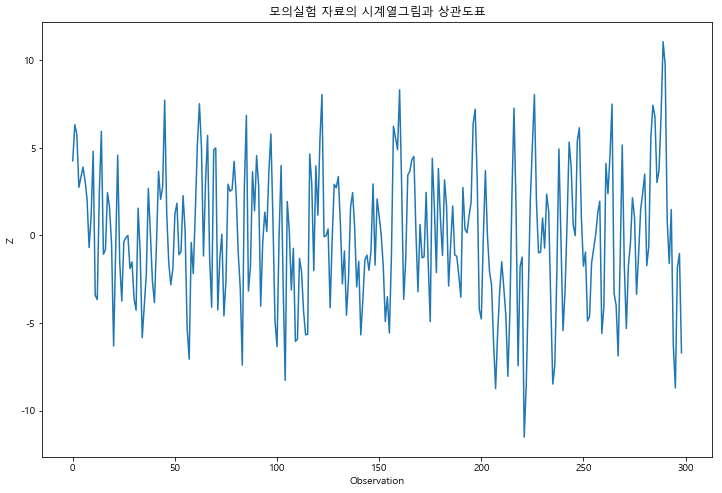

In [18]:
plt.figure(figsize=(12,8))
plt.plot(diff_data)
plt.title('1차 차분된 모의실험 자료의 시계열그림과 상관도표')
plt.xlabel('Observation')
plt.ylabel('Z')
plt.show()

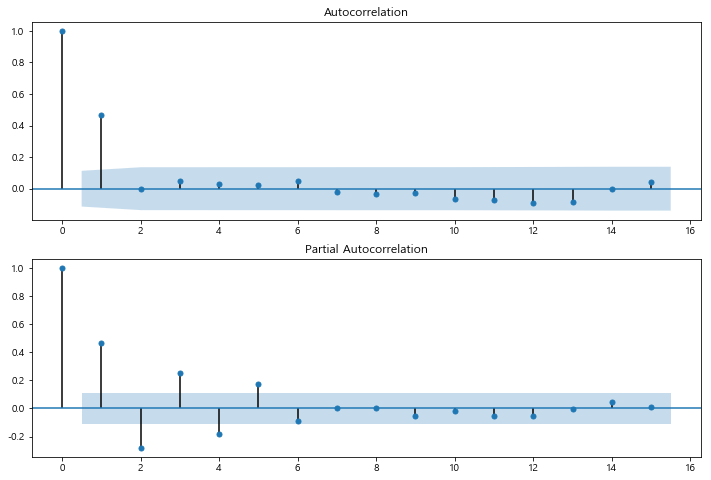

In [29]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = plot_acf(diff_data,lags=15,ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(diff_data,lags=15,ax=ax2,method='ywmle')

In [22]:
model2=sm.tsa.ARIMA(data_2,(0,1,1))
m_fit2=model2.fit()
print(m_fit2.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  299
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -760.929
Method:                       css-mle   S.D. of innovations              3.079
Date:                Thu, 27 Feb 2020   AIC                           1527.858
Time:                        17:05:22   BIC                           1538.959
Sample:                             1   HQIC                          1532.301
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0145      0.313     -0.046      0.963      -0.628       0.599
ma.L1.D.y      0.7605      0.034     22.208      0.000       0.693       0.828
                                    Roots           

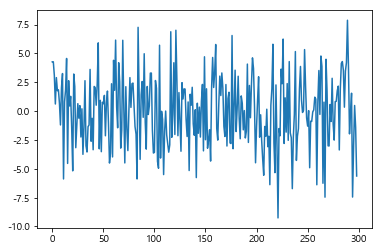

In [30]:
#P363. ARIMA(0,1,1)모형 적합 후 잔차의 시계열그림과 상관도표
resid=m_fit2.resid
plt.plot(resid)

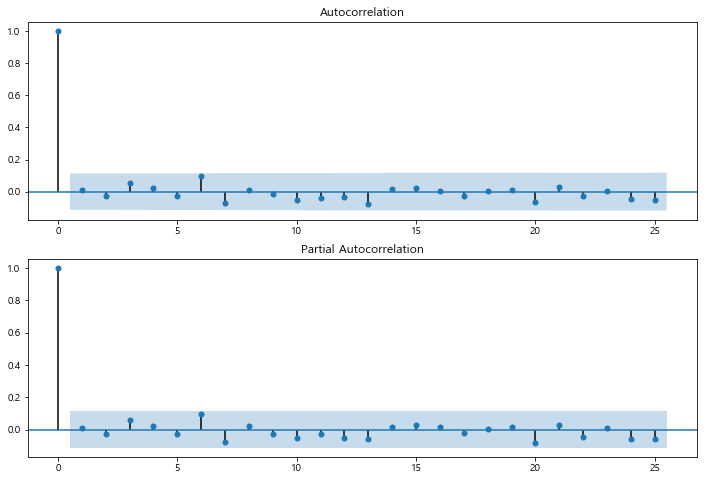

In [31]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = plot_acf(resid,lags=25,ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(resid,lags=25,ax=ax2,method='ywmle')

In [88]:
#P.363 표9-2 예측원점 n=300에서 미래 25시점까지의 예측 결과
fred, se, confint = m_fit2.forecast(25)
#fred = forecast #se = Std Error  #confint = Lower95% ; Upper 95%
Obs=[]
for i in range(301,326):
    Obs.append(i)
table_fred = pd.DataFrame(fred, Obs, columns=['Forecast'])
table_se= pd.DataFrame(se, Obs, columns=['Std Error'])
table_confint=pd.DataFrame(confint, Obs, columns=['Lower 95%','Upper 95%'])
table9_2=pd.concat([table_fred,table_se,table_confint],axis=1)

In [90]:
#표9-2 예측원점 n=300에서 미래 25시점까지의 예측 결과
table9_2

,Forecast,Std Error,Lower 95%,Upper 95%
301,129.010850,3.078769,122.976574,135.045126
302,128.996344,6.233512,116.778884,141.213804
303,128.981838,8.260420,112.791713,145.171964
304,128.967332,9.879899,109.603087,148.331578
305,128.952826,11.268995,106.866001,151.039652
306,128.938320,12.504724,104.429512,153.447129
307,128.923815,13.628866,102.211729,155.635900
308,128.909309,14.667101,100.162320,157.656298
309,128.894803,15.636550,98.247728,159.541878
310,128.880297,16.549307,96.444251,161.316343


In [89]:
#P364. 그림9-5 관측값과 예측값의 시계열그림
n=[]
for i in range(1,301):
    n.append(i)
table_data_2=pd.DataFrame(data_2, n, columns=['Forecast'])
graph2=pd.concat([table_data_2,table_fred])

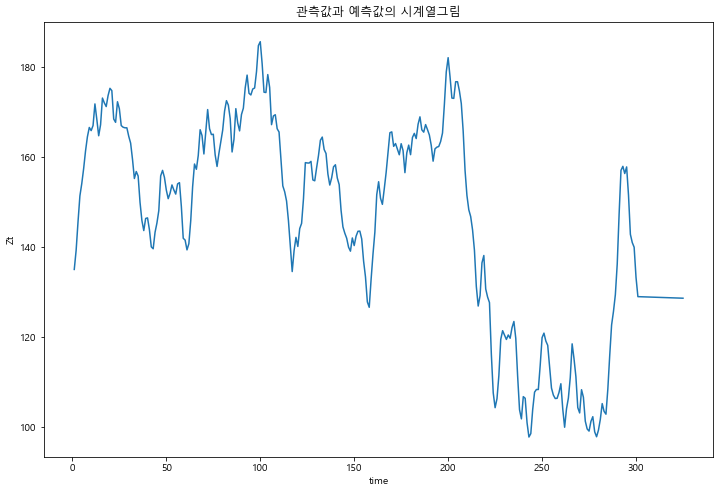

In [91]:
plt.figure(figsize=(12,8))
plt.plot(graph2, label='z')
plt.title('관측값과 예측값의 시계열그림')
plt.xlabel('time')
plt.ylabel('Zt')
plt.show()